# Beginning of Decision tree 

In [161]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
# import math as sqrt
# import warnings
# from matplotlib import style
# from collections import Counter
# style.use('fivethirtyeight')

# Importing training data
data = pd.read_csv("creditdefault_train.csv",  sep= ',')
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


In [162]:
# Printing length and shape
print(len(data))
print(data.shape)

15000
(15000, 24)


In [163]:
# Seperating the target variable(as a Global variable) 
# It will be used throughout the notebook as Training data variables in all the algorithms
X = data.values[:, 1:24]
Y = data.values[:, 0]

# Splitting Dataset into Test and Train
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.3, random_state = 100)

# Function to perform training with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [164]:
# Creating a variable predY to predict Accuracy 
predY = clf_entropy.predict(X)
predictions = pd.concat([data['Y'],pd.Series(predY,name='Predicted Y')], axis=1)
predictions

,Y,Predicted Y
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,1,0


In [165]:
# Importing accuracy_score library
from sklearn.metrics import accuracy_score

# Printing Accuracy score before Cross-Validation
print('Accuracy on training data before Cross-Validation is %.2f' % (accuracy_score(Y, predY)),'%')

Accuracy on training data before Cross-Validation is 0.82 %


In [166]:
# Importing required libraries
from sklearn.model_selection import cross_val_score
from pprint import pprint

In [167]:
# Importing GridSearchCV modules
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(2,20), 'criterion':['gini', 'entropy']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=10, n_jobs=4)
clf.fit(X=X, y=Y)
best_tree_model = clf.best_estimator_
print ('Best accuracy and parameters are', clf.best_score_, clf.best_params_) 



Best accuracy and parameters are 0.8217333333333333 {'criterion': 'entropy', 'max_depth': 2}


In [168]:
# Creating a variable predY to predict Accuracy 
predY = best_tree_model.predict(X)
predictions = pd.concat([pd.Series(Y, name='Y'), pd.Series(predY,name='PredictedY')], axis=1)
predictions.head()

,Y,PredictedY
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [169]:
# Printing accuracy after cross-validation
print('Accuracy on training data after Cross-validation is %.2f'%(accuracy_score(Y, predY)), '%')

Accuracy on training data after Cross-validation is 0.82 %


In [170]:
# Importing test data
testData = pd.read_csv("creditdefault_test.csv",  sep= ',')
testData.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66


In [171]:
# Seperating the target variable for testData(as a Global variable)
# It will be used throughout the notebook as Testing data variables in all the algorithms
testY = testData['Y']
testX = testData.drop(['Y'],axis=1)

In [172]:
# Function to measure depth
depth = []
for i in range(2,20):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    # Perform 10-fold cross validation in parallel on 4 threads
    scores = cross_val_score(estimator=clf, X=X, y=Y, cv=10, n_jobs=4)
    depth.append((i, scores.mean()))
print(depth)

[(2, 0.8217354340750077), (3, 0.8198019230823361), (4, 0.8193352562378916), (5, 0.8204017896600547), (6, 0.8201354785491015), (7, 0.8188688562972695), (8, 0.8130012994968739), (9, 0.8112031210976834), (10, 0.8077356097195303), (11, 0.8026694307271545), (12, 0.7990696524457714), (13, 0.7917368958534352), (14, 0.7857379616909459), (15, 0.7801358711714983), (16, 0.7742702256312114), (17, 0.7681368025793196), (18, 0.7656037801498281), (19, 0.7586021340157634)]


In [173]:
predY = best_tree_model.predict(testX)
predictions = pd.concat([testY, pd.Series(predY,name='PredictedY')], axis=1)
predictions.head()

,Y,PredictedY
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [174]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.82


# End of Decision tree

# Beginning of KNN 

In [175]:
# Printing .head of the dataset
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


## Link used for reference 
* https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a


In [176]:
from sklearn.model_selection import train_test_split
#split dataset into train  data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [177]:
# Importing KNeighborsClassifier from SKLearn
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [178]:
#show first 20 model predictions on the train data
knn.predict(X_train)[0:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [179]:
#show first 20 model predictions on the test data
knn.predict(X_test)[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [180]:
#Checking accuracy of our model on the training data
knn.score(X, Y)
print('Accuracy of training data before cross-validation:', (knn.score(X, Y)), '%')

Accuracy of training data before cross-validation: 0.8186 %


In [181]:
from sklearn.model_selection import cross_val_score
import numpy as np
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#training model with CV of 5 
cv_scores = cross_val_score(knn_cv, X, Y, cv=5)
#print each cv score (accuracy) and average them using mean
print('Accuracy of training data after cross-validation:',(format(np.mean(cv_scores))), '%')

Accuracy of training data after cross-validation: 0.7312012874149578 %


In [182]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, Y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [183]:
# Printing 
print ('Best parameters of n_neighbours are', knn_gscv.best_params_) 
print ('Best accuracy of n_neighbours are', knn_gscv.best_score_) 

Best parameters of n_neighbours are {'n_neighbors': 24}
Best accuracy of n_neighbours are 0.7774666666666666


## Reference link used for Knn chart
* https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-k-nearest-neighbors-algorithm-exercise-8.php

In [184]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors


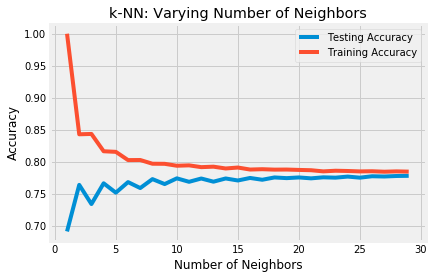

In [185]:
no_neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X,Y)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X, Y)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(testX, testY)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Figure showcasing accuracy  

# Best model justification
### KNN was easy to implement and computes data in a reasonable timeframe. KNN performs very well with a lot of data points and in this assignments instance, we had datasets with 23 data points so it was uncomplicated to predict the classification of a new target variable.

# End of KNN 

# Beginning of Random forest

# Reference
* https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
* https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/


In [186]:
# Printing .head
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


In [187]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, max_features=10, n_estimators=10)
rfModel = rf.fit(X, Y)


In [188]:
 print(rfModel.feature_importances_)

[0.05953653 0.01009277 0.02037856 0.01397977 0.07172873 0.12421304
 0.05963434 0.02195201 0.01124236 0.01945192 0.01131523 0.06188345
 0.05355255 0.04592377 0.04590696 0.04610228 0.04518364 0.05036449
 0.04665295 0.04878702 0.04168387 0.04342204 0.04701172]


In [189]:
predY = rfModel.predict(X)
predictions = pd.concat([data['Y'],pd.Series(predY,name='Predicted Y')], axis=1)
predictions.head()

,Y,Predicted Y
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [190]:
# Importing accuracy_score module from sklearn
from sklearn.metrics import accuracy_score

print('Accuracy of training data before Cross-validation is %.2f' % (accuracy_score(Y, predY)), '%')

Accuracy of training data before Cross-validation is 0.98 %


In [191]:
# Importing required libraries
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)

In [192]:
# Importing required libraries
from sklearn.model_selection import cross_val_score

# Variable created for Cross-validation accuracies
all_accuracies = cross_val_score(estimator=classifier, X=X, y=Y, cv=5)
all_accuracies = all_accuracies*100 

In [193]:
# Printing accuracy after Cross-validation
print('Accuracy of training data after Cross-validation is %.2f' % all_accuracies.mean(), '%')

Accuracy of training data after Cross-validation is 81.76 %


# End of Random forest


# Beginning of Bagging & Boosting

# Link used for reference
* https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/


In [194]:
# Importing required libraries
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [195]:
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


In [196]:
# Importing required libraries
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

# Defining local variables 
numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

# Classifer for Bagging, which uses the above variables as arguments or parameters
clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
# Fitting the training dataset into the model
clf.fit(X, Y)
Y_predTrain = clf.predict(X)
Y_predTest = clf.predict(testX)
trainAcc.append(accuracy_score(Y, Y_predTrain))
testAcc.append(accuracy_score(testY, Y_predTest))

In [197]:
# Printing Accuracy of training data
print('Accuracy of training data before cross-validation is', trainAcc, '%.')

Accuracy of training data before cross-validation is [0.8706] %.


In [198]:
# Printing Accuracy of test data
print('Accuracy of test data is', testAcc, '%.')

Accuracy of test data is [0.8182] %.


## Link used for Cross-validation 
* https://www.pluralsight.com/guides/ensemble-modeling-scikit-learn

In [199]:
# Importing required modules
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier


kfold = model_selection.KFold(n_splits=10, random_state=10)
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=10)
results_1 = model_selection.cross_val_score(model, X, Y, cv=kfold)
print('Model accuracy after Cross-validation is', results_1.mean(), '%.')

Model accuracy after Cross-validation is 0.8148666666666667 %.


# End of bagging

# Beginning of Boosting

In [200]:
# No libraries were imported as libraries & modules from the previous algorithm

# Classifer for Boosting, which uses the above variables as arguments or parameters
clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
# Fitting the training dataset into the model
clf.fit(X, Y)
Y_predTrain = clf.predict(X)
Y_predTest = clf.predict(testX)
trainAcc.append(accuracy_score(Y, Y_predTrain))
testAcc.append(accuracy_score(testY, Y_predTest))

In [201]:
# Printing Accuracy of training data
print('Accuracy of training data before cross-validation is', trainAcc, '%.')

Accuracy of training data before cross-validation is [0.8706, 0.9997333333333334] %.


In [202]:
# Printing Accuracy of test data 
print('Test accuracy is', testAcc, '%.')

Test accuracy is [0.8182, 0.7816] %.


In [203]:
from sklearn.ensemble import AdaBoostClassifier
kfold_ada = model_selection.KFold(n_splits=10, random_state=10)
model_ada = AdaBoostClassifier(n_estimators=30, random_state=10)
results_ada = model_selection.cross_val_score(model_ada, X, Y, cv=kfold_ada)


In [204]:
# Printing Accuracy of training data after Cross-Validation
print('Accuracy accuracy after Cross-validation is', results_ada.mean(), '%.')

Accuracy accuracy after Cross-validation is 0.8176666666666665 %.


##  Link used for reference
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

MSE: 0.1347


Text(0, 0.5, 'Deviance')

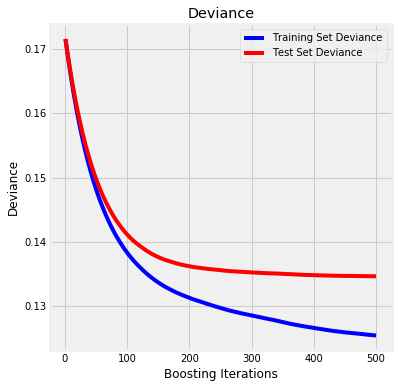

In [205]:
# Plot training deviance

from sklearn.metrics import mean_squared_error
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X, Y)
mse = mean_squared_error(testY, clf.predict(testX))
print("MSE: %.4f" % mse)

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(testX)):
    test_score[i] = clf.loss_(testY, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# End of Boosting